In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
G = (lambda x,y,z: 3*x - y - z - 1.,\
    lambda x,y,z: -x + 3*y + z -3.,\
    lambda x,y,z: 2*x + y + 4*z - 7)

In [3]:
def GetVectorF(G,r):
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0], r[1], r[2])
    return v

In [4]:
GetVectorF(G, [1,1,1])

array([0., 0., 0.])

In [5]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [6]:
GetMetric(G,[1,1,1])

0.0

In [7]:
def GetJacobian(G, r, h=1e-6):
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        #derivadas parciales
        J[i,0] = (G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]))/(2*h)
        J[i,1] = (G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]))/(2*h)
        J[i,2] = (G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h))/(2*h)
    return J.T

In [8]:
GetJacobian(G,[0,0,0])

array([[ 3., -1.,  2.],
       [-1.,  3.,  1.],
       [-1.,  1.,  4.]])

In [9]:
def GetFig(F, R, it):
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.plot(F[:it])
    ax1.plot(R[:it])
    plt.show


In [12]:
def GetSolve(G,r,lr=1e-5,epochs=int(1e5),error=1e-7):
    #lr es el learning rate, G la función vectorial, r el punto en el que entra
    
    d = 1
    it = 0
    Vector_F = np.array([])
    Vector_R = np.array(r)
    
    while  d > error and it < epochs:
        CurrentF = GetMetric(G,r)
        J = GetJacobian(G,r)
        GVector = GetVectorF(G,r)
        
        # Machine Learning
        r -= lr*np.dot(J,GVector)
        Vector_R = np.vstack((Vector_R,r))
        NewF = GetMetric(G,r)
        Vector_F = np.append(Vector_F,NewF)
        
        if it%500 == 0:
            clear_output(True)
            GetFig(Vector_F,Vector_R,it)
            time.sleep(0.01)
            
        it += 1
        
    return r,it
        
    return r,it


KeyboardInterrupt: 

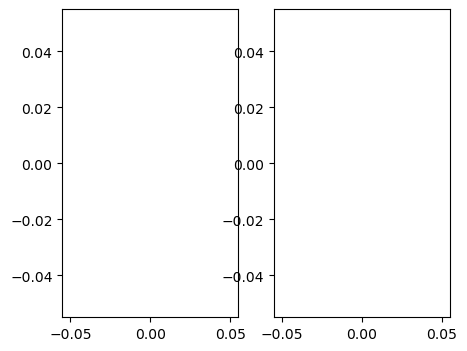

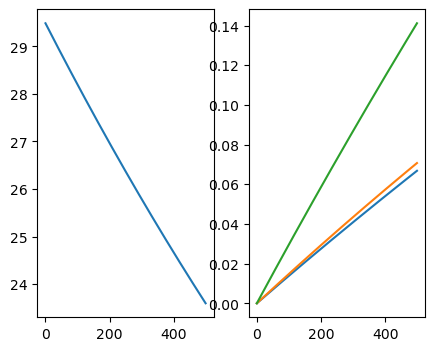

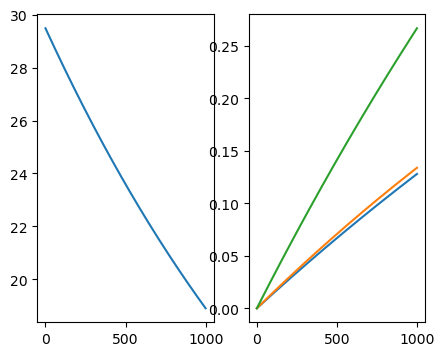

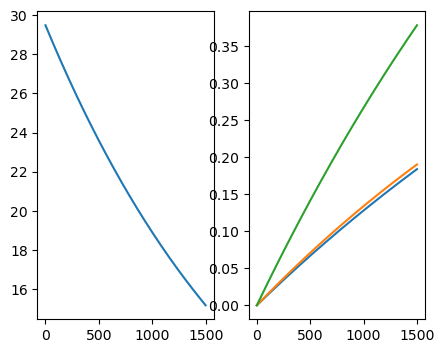

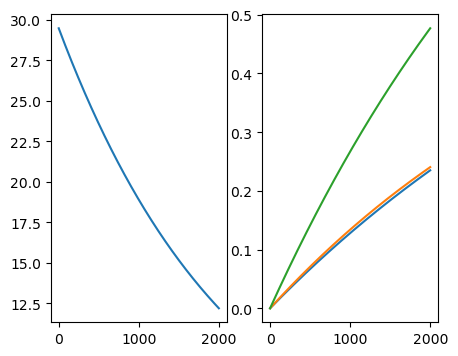

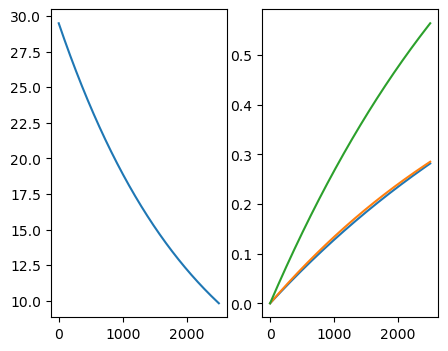

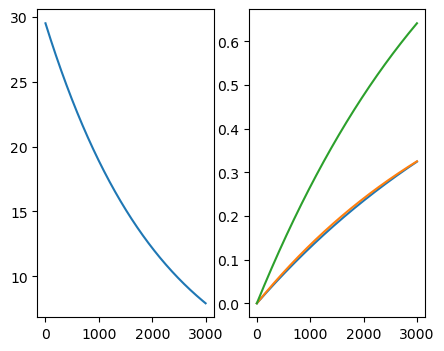

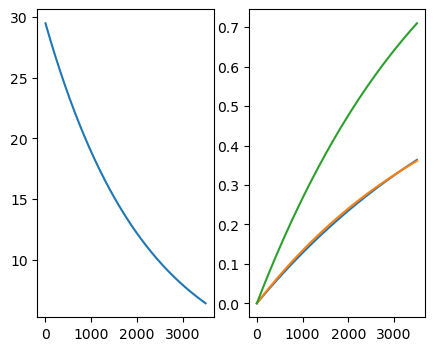

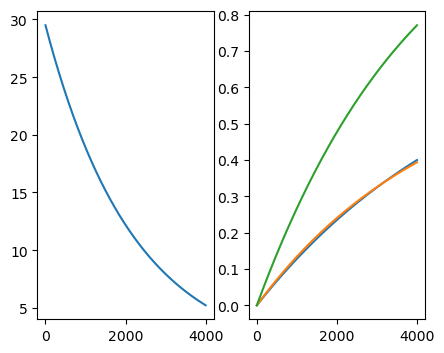

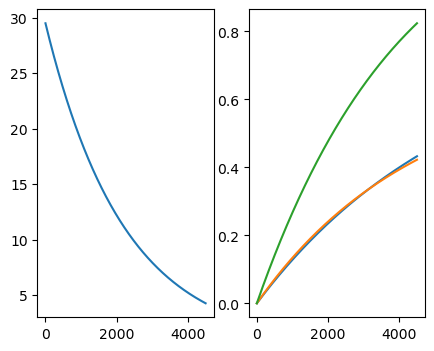

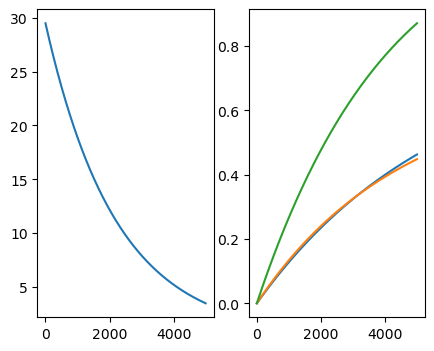

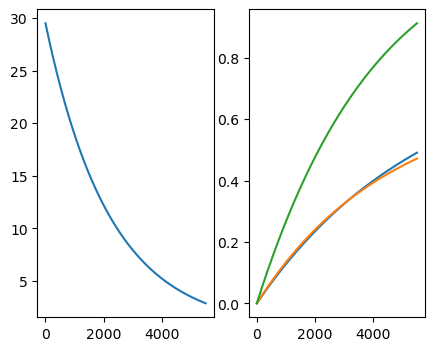

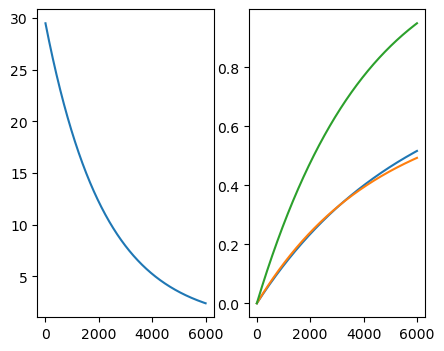

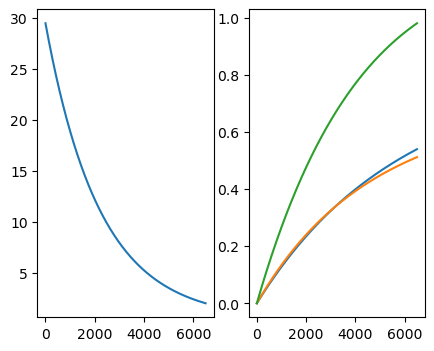

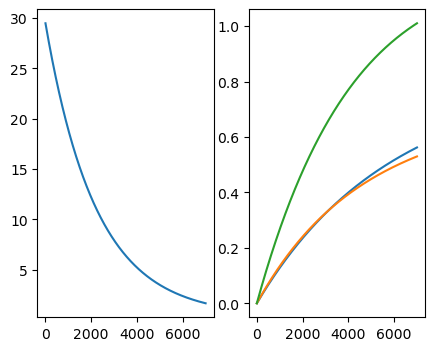

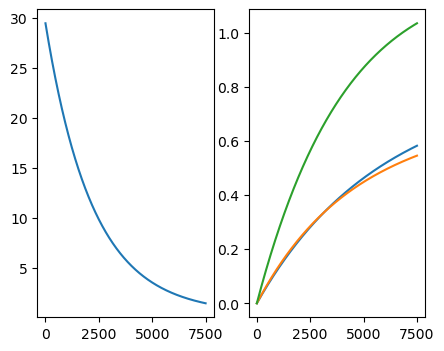

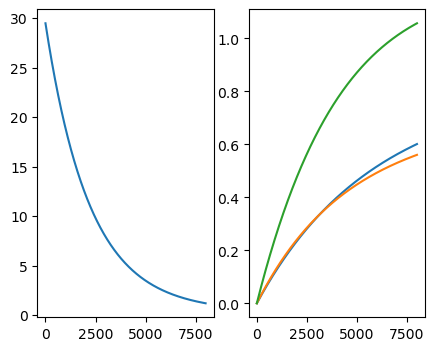

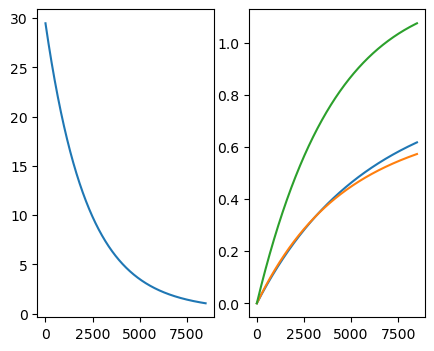

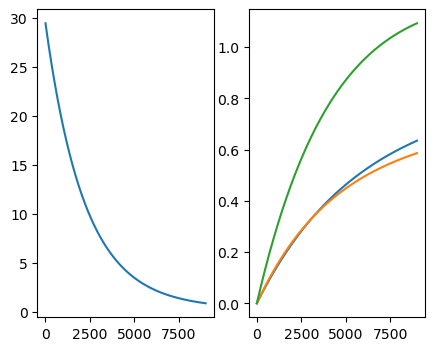

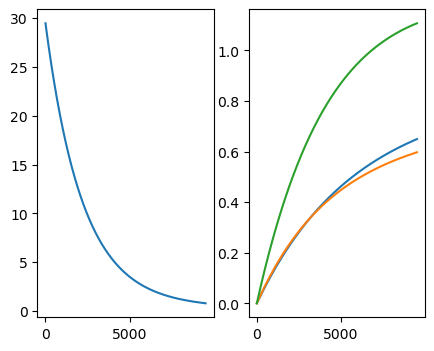

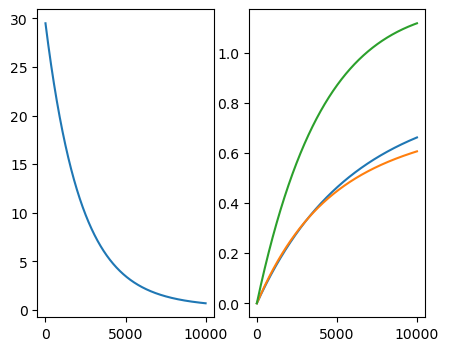

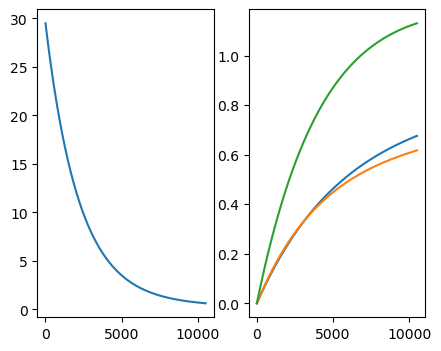

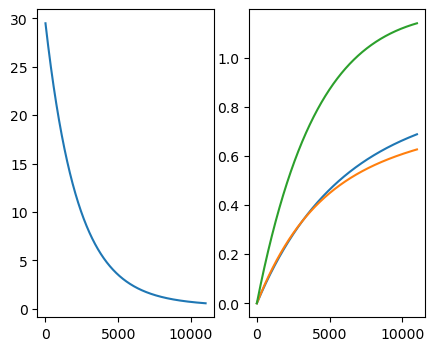

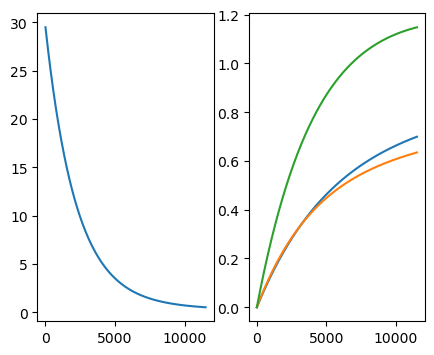

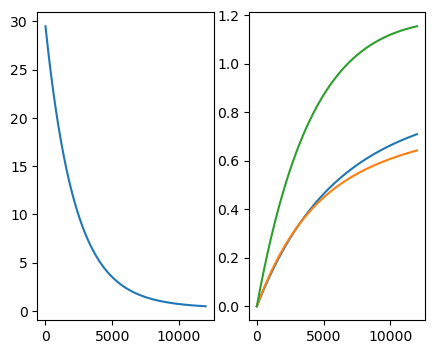

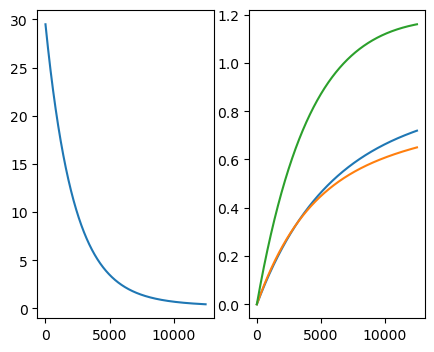

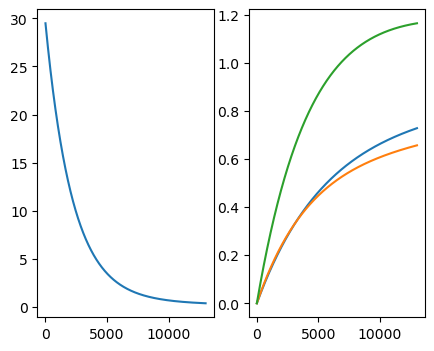

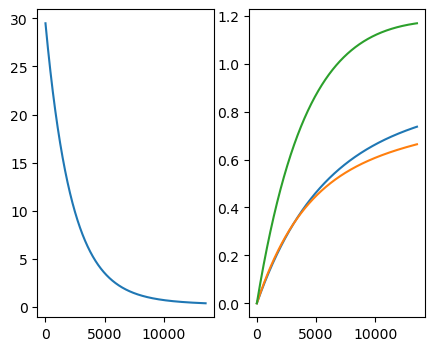

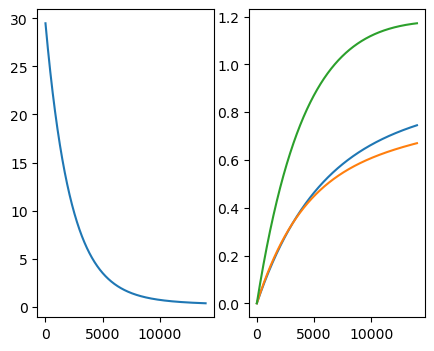

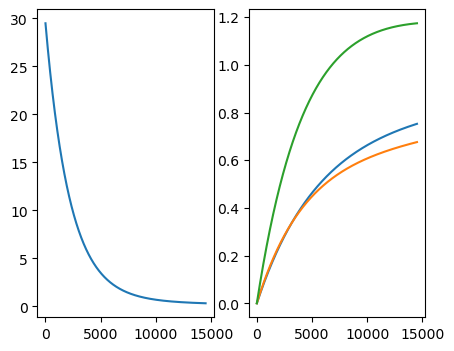

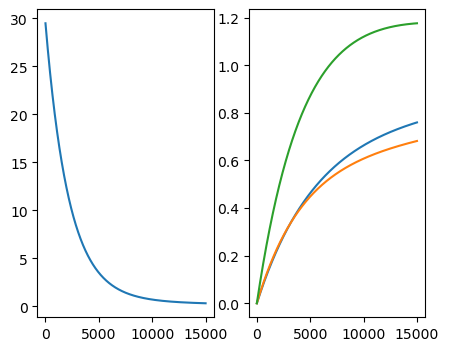

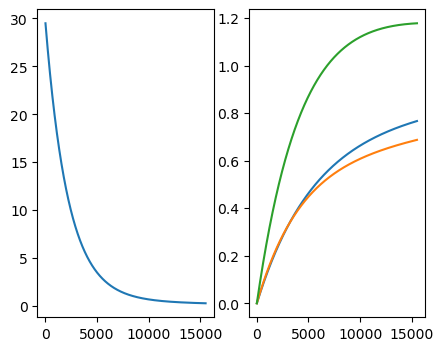

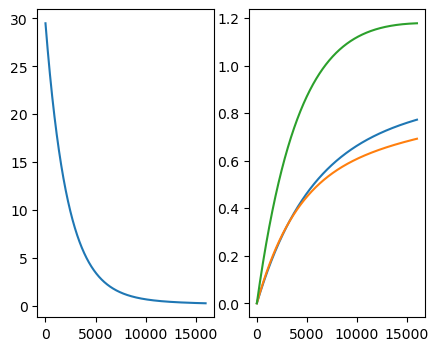

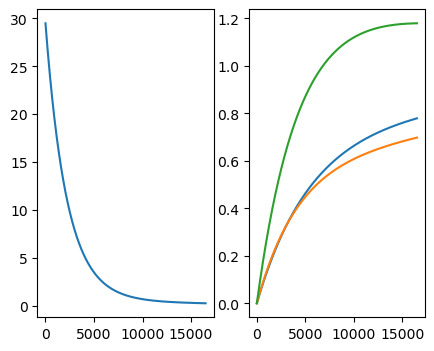

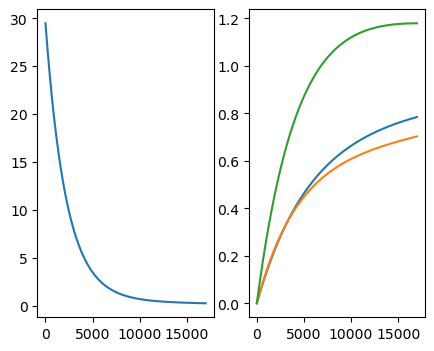

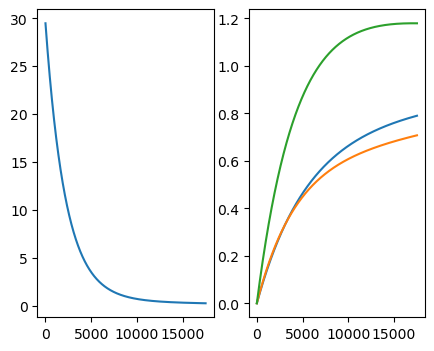

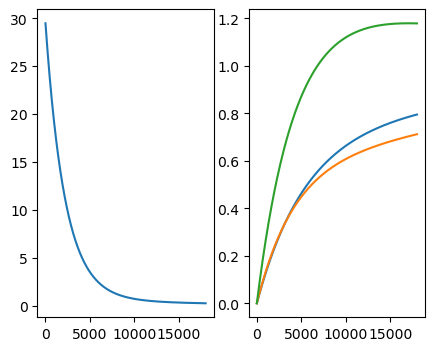

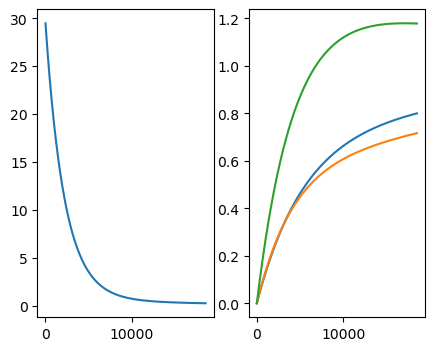

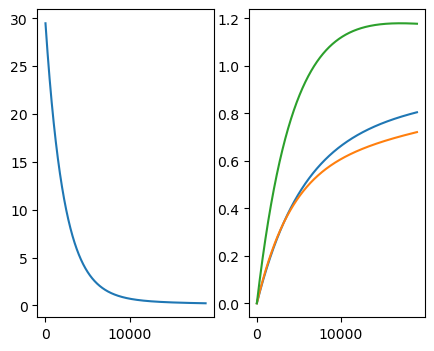

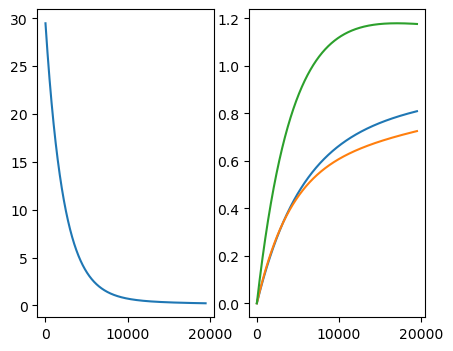

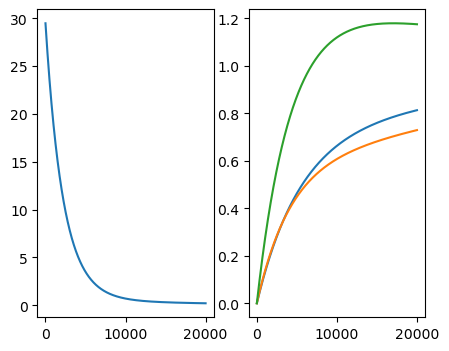

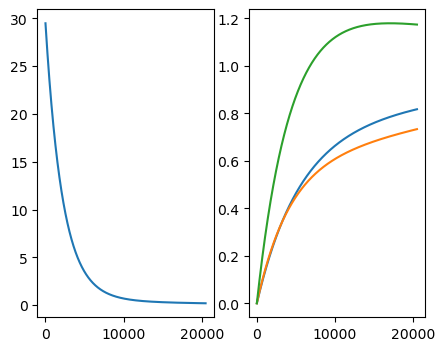

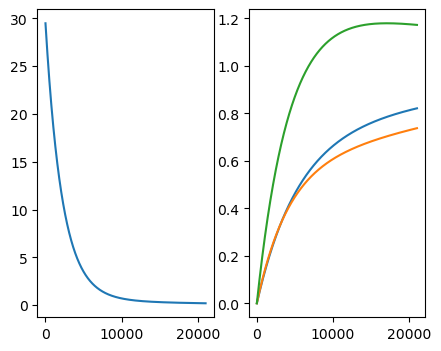

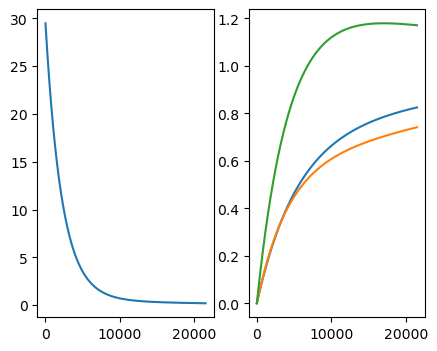

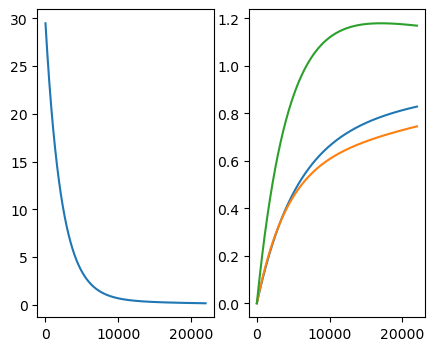

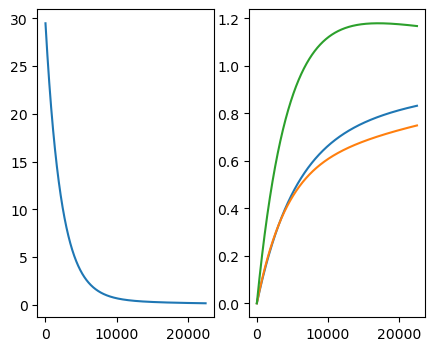

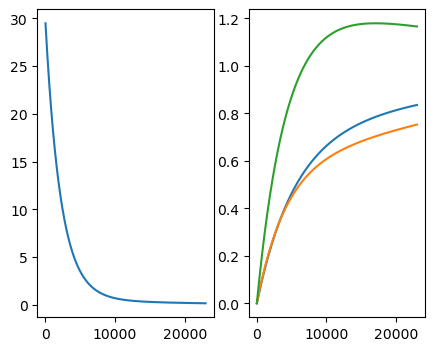

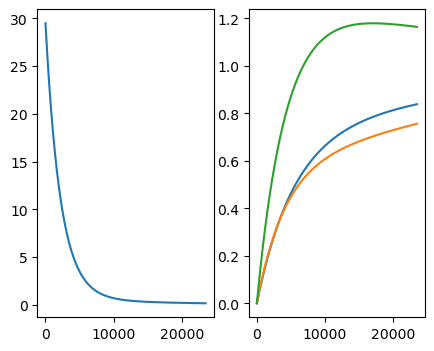

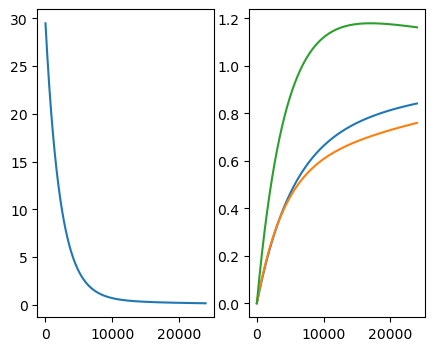

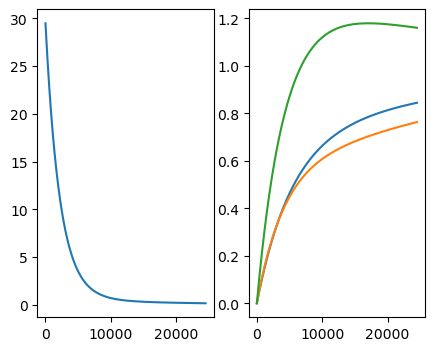

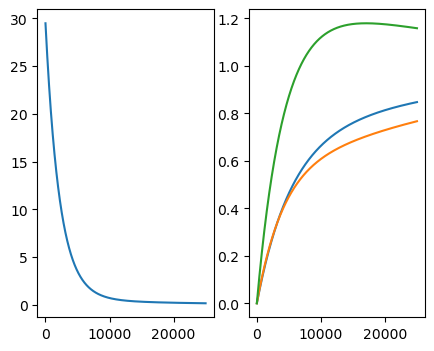

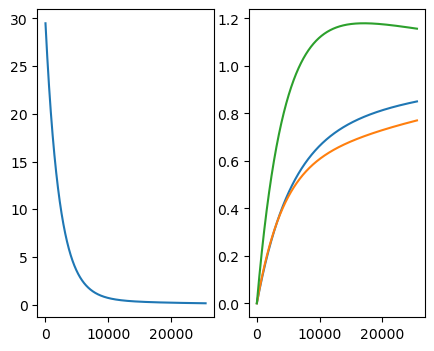

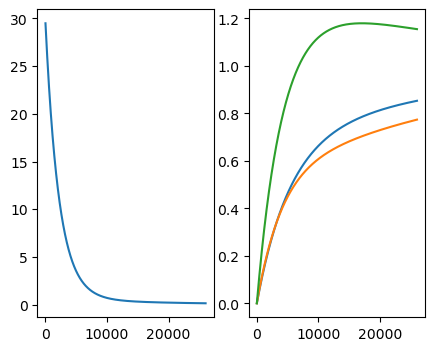

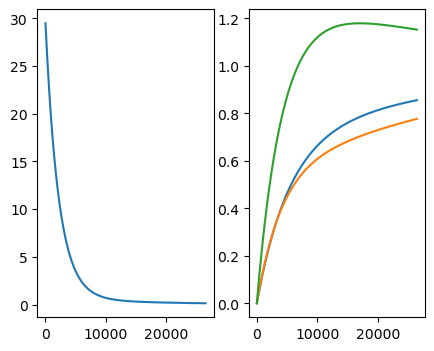

In [13]:
xsol, it = GetSolve(G,[0,0,0])

In [ ]:
H = (lambda x,y,z: 6*x - 2*np.cos(y*z) - 1.,\
    lambda x,y,z: 9*y + np.sqrt(x**2 + np.sin(z) + 1.06) + 0.9,\
    lambda x,y,z: 60*z + 3*np.exp(-x*y) + 10*np.pi - 3)